# Redes Neuronales Artificiales 

### 2. Selección de la Variable Respuesta (clasificación)


Distribución de categorías de precios (SalePrice_cat):
SalePrice_cat
caro      497
barato    483
medio     480
Name: count, dtype: int64


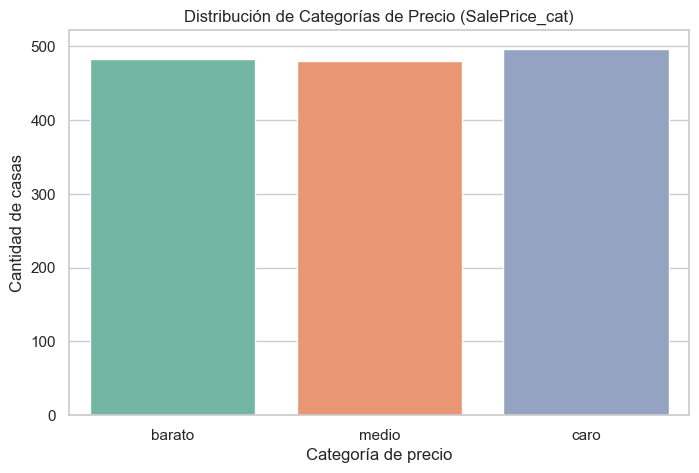

In [6]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configuración general
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Cargar dataset
df = pd.read_csv("../data/train_preprocessed.csv")

# Crear categorías de precio basadas en terciles
df['SalePrice_cat'] = pd.cut(df['SalePrice'],
                             bins=[-np.inf, df['SalePrice'].quantile(0.33),
                                   df['SalePrice'].quantile(0.66),
                                   np.inf],
                             labels=['barato', 'medio', 'caro'])

# Verificar la nueva variable
print("\nDistribución de categorías de precios (SalePrice_cat):")
print(df['SalePrice_cat'].value_counts())

# Visualización gráfica corregida
plt.figure(figsize=(8,5))
sns.countplot(x='SalePrice_cat', hue='SalePrice_cat', data=df, palette='Set2', legend=False)
plt.title('Distribución de Categorías de Precio (SalePrice_cat)')
plt.xlabel('Categoría de precio')
plt.ylabel('Cantidad de casas')
plt.show()

### 3. Modelado de Redes Neuronales para Clasificación

Iteration 1, loss = 0.97434427
Iteration 2, loss = 0.73267197
Iteration 3, loss = 0.56715021
Iteration 4, loss = 0.45520975
Iteration 5, loss = 0.39480880
Iteration 6, loss = 0.34870374
Iteration 7, loss = 0.31643356
Iteration 8, loss = 0.29111115
Iteration 9, loss = 0.25600793
Iteration 10, loss = 0.23566035
Iteration 11, loss = 0.21625818
Iteration 12, loss = 0.19898705
Iteration 13, loss = 0.17657560
Iteration 14, loss = 0.16251158
Iteration 15, loss = 0.15093761
Iteration 16, loss = 0.13876821
Iteration 17, loss = 0.12620460
Iteration 18, loss = 0.11689657
Iteration 19, loss = 0.10153286
Iteration 20, loss = 0.08842699
Iteration 21, loss = 0.07743469
Iteration 22, loss = 0.07133647
Iteration 23, loss = 0.06182473
Iteration 24, loss = 0.05786243
Iteration 25, loss = 0.05212559
Iteration 26, loss = 0.04622478
Iteration 27, loss = 0.03966352
Iteration 28, loss = 0.03392060
Iteration 29, loss = 0.02992124
Iteration 30, loss = 0.02606975
Iteration 31, loss = 0.02308913
Iteration 32, los

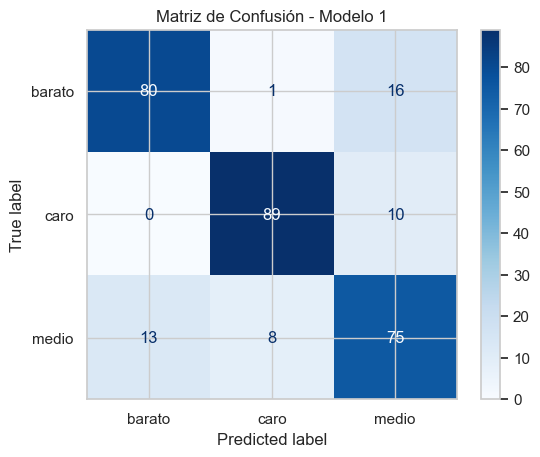

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Variables predictoras y target
X = df.drop(columns=["SalePrice", "SalePrice_cat"])
y = df["SalePrice_cat"]

# Separamos columnas
categoricas = X.select_dtypes(include='object').columns
numericas = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesador
preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
])

# Aplicamos el preprocesador
X_scaled = preprocesador.fit_transform(X)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Primer modelo de clasificación
modelo_clf_1 = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=300, random_state=42, verbose=True)
modelo_clf_1.fit(X_train, y_train)

# Predicciones
y_pred_1 = modelo_clf_1.predict(X_test)

# Resultados
print("\nReporte de Clasificación - Modelo 1 (Topología 128-64-32 con ReLU):")
print(classification_report(y_test, y_pred_1))

# Matriz de Confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_1), display_labels=modelo_clf_1.classes_).plot(cmap='Blues')
plt.title('Matriz de Confusión - Modelo 1')
plt.show()


Iteration 1, loss = 0.77378803
Iteration 2, loss = 0.44028351
Iteration 3, loss = 0.36556927
Iteration 4, loss = 0.33151202
Iteration 5, loss = 0.29776211
Iteration 6, loss = 0.27617643
Iteration 7, loss = 0.26457692
Iteration 8, loss = 0.24550095
Iteration 9, loss = 0.23859960
Iteration 10, loss = 0.21685282
Iteration 11, loss = 0.20450653
Iteration 12, loss = 0.19432558
Iteration 13, loss = 0.18339250
Iteration 14, loss = 0.17284088
Iteration 15, loss = 0.16589414
Iteration 16, loss = 0.15953452
Iteration 17, loss = 0.15195778
Iteration 18, loss = 0.15118664
Iteration 19, loss = 0.14228735
Iteration 20, loss = 0.13963769
Iteration 21, loss = 0.13325137
Iteration 22, loss = 0.12291106
Iteration 23, loss = 0.11800121
Iteration 24, loss = 0.10850783
Iteration 25, loss = 0.10732476
Iteration 26, loss = 0.11219507
Iteration 27, loss = 0.09697487
Iteration 28, loss = 0.09211994
Iteration 29, loss = 0.09935171
Iteration 30, loss = 0.09749455
Iteration 31, loss = 0.08808667
Iteration 32, los

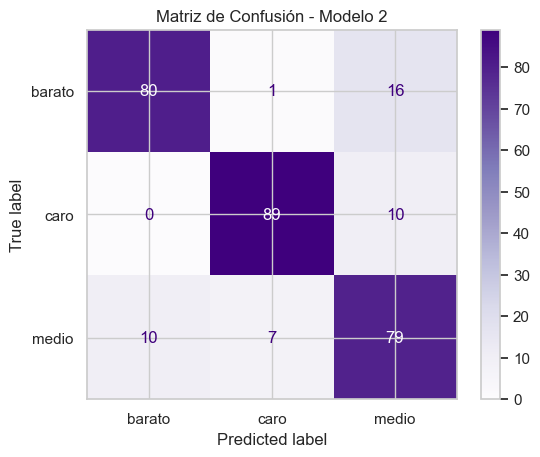

In [10]:
# Segundo modelo de clasificación
modelo_clf_2 = MLPClassifier(hidden_layer_sizes=(256, 128), activation='tanh', max_iter=300, random_state=42, verbose=True)
modelo_clf_2.fit(X_train, y_train)

# Predicciones
y_pred_2 = modelo_clf_2.predict(X_test)

# Resultados
print("\nReporte de Clasificación - Modelo 2 (Topología 256-128 con Tanh):")
print(classification_report(y_test, y_pred_2))

# Matriz de Confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_2), display_labels=modelo_clf_2.classes_).plot(cmap='Purples')
plt.title('Matriz de Confusión - Modelo 2')
plt.show()